<a href="https://colab.research.google.com/github/granantuin/LEVX_regression/blob/master/Display_regre_LEVX_spd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
drive_metar="/content/drive/My Drive/Colab Notebooks/model_vs_data/Metar_2018/"
dr=[drive_4km,drive_1km,drive_metar]
y_data=pd.read_excel(dr[2]+"y_LEVX_spd.xlsx",index_col=0)
x_data=pd.read_csv(dr[2]+"x_LEVX.csv",index_col=0)
x_data=x_data.iloc[:,9:18]
y_data=y_data[y_data>0]*0.514# delete station errors
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result.iloc[:,9:10]

In [8]:
y_data.describe()

,value
count,8158.000000
mean,3.619419
std,2.198652
min,0.591100
25%,1.773300
50%,2.955500
75%,4.728800
max,18.324101


In [9]:
x_data.describe()

,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1
count,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000
mean,3.671898,3.406192,2.973151,3.790932,3.631696,3.311059,3.810078,3.713442,4.169814
std,2.272705,2.283316,2.236163,2.386453,2.322313,2.260335,2.506590,2.483792,2.695827
min,0.020636,0.006092,0.024748,0.003955,0.010303,0.017606,0.021887,0.004725,0.024732
25%,1.862310,1.550212,1.175614,1.961788,1.834400,1.531330,1.840141,1.735306,2.005669
50%,3.311097,3.045382,2.446820,3.481654,3.308409,2.904021,3.470348,3.386201,3.823172
75%,5.076851,4.832235,4.353297,5.162317,4.960534,4.635760,5.178246,5.171592,5.795745
max,16.048155,15.450510,14.616387,16.205406,15.409128,14.598989,15.778026,15.459547,16.967966


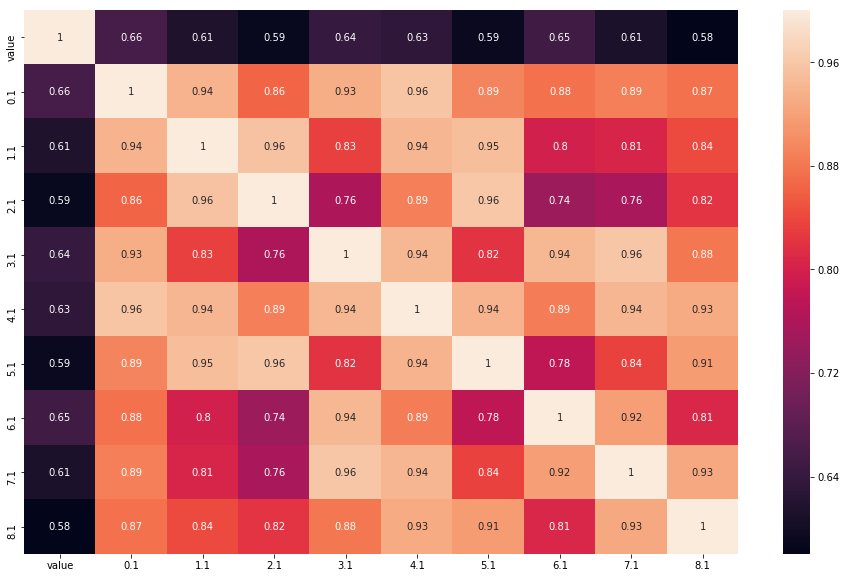

In [10]:
df2=pd.concat([y_data, x_data], axis=1)
plt.figure(figsize=(16, 10))
sns.heatmap(df2.corr(),annot=True)

<Figure size 1152x720 with 0 Axes>

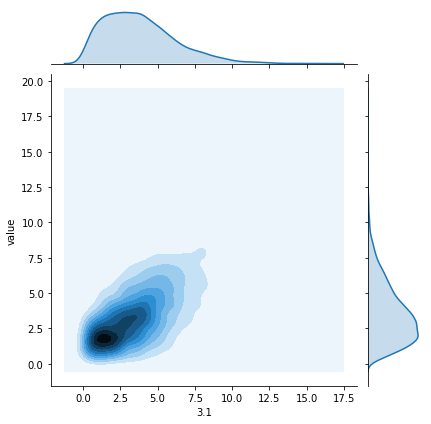

In [12]:
plt.figure(figsize=(16, 10))
ax=sns.jointplot("3.1", "value", data=df2, kind="kde",)

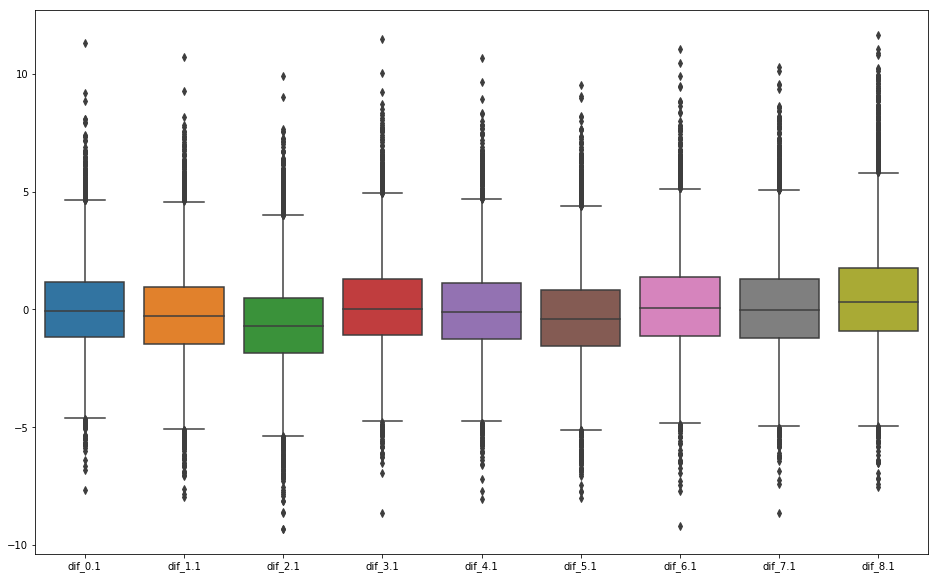

In [13]:
for column in df2.columns:
  df2["dif_"+column]=df2[column]-df2["value"]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]<180]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]>-180]
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=df2.iloc[:,11:20])